In [1]:
#!pip install missingno
#!pip install basemap
#!pip install sweetviz 

In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt # plotting
import os # accessing directory structure
#import seaborn as sns
#from fitter import Fitter, get_common_distributions, get_distributions
import seaborn as sns
from numpy import random

# to plot nulls
import missingno as msno

# to display all columns
pd.set_option('display.max_columns', None)

#to plot the map of USA
#from mpl_toolkits.basemap import Basemap

# data profiling using sweetviz
import sweetviz as sv

import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('2018.csv')

In [4]:
#analyze_report = sv.analyze(df)
#analyze_report.show_html('report_rawdata.html', open_browser=True)

In [5]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,NaN,0.0,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,NaN,0.0,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,NaN,0.0,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,NaN,0.0,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,NaN,0.0,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [7]:
print(f'rows:{df.shape[0]}, columns: {df.shape[1]}')

rows:7213446, columns: 28


In [8]:
df.nunique()

FL_DATE                 365
OP_CARRIER               18
OP_CARRIER_FL_NUM      7113
ORIGIN                  358
DEST                    358
CRS_DEP_TIME           1369
DEP_TIME               1440
DEP_DELAY              1488
TAXI_OUT                180
WHEELS_OFF             1440
WHEELS_ON              1440
TAXI_IN                 205
CRS_ARR_TIME           1431
ARR_TIME               1440
ARR_DELAY              1527
CANCELLED                 2
CANCELLATION_CODE         4
DIVERTED                  2
CRS_ELAPSED_TIME        582
ACTUAL_ELAPSED_TIME     706
AIR_TIME                676
DISTANCE               1555
CARRIER_DELAY          1330
WEATHER_DELAY          1037
NAS_DELAY               952
SECURITY_DELAY          214
LATE_AIRCRAFT_DELAY     978
Unnamed: 27               0
dtype: int64

In [9]:
# RangeIndex: 7213446 entries, 0 to 7213445
# Data columns (total 28 columns):


In [10]:
#Preview of columns before cleaning the data
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,NaN,0.0,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,NaN,0.0,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,NaN,0.0,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,NaN,0.0,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,NaN,0.0,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.shape[0]


7213446

Data cleaning and formatting

In [12]:
#Dropping specific columns to reduce dimensionality 
#reducing columns that are not of interest 

#columns_to_drop = ['OP_CARRIER_FL_NUM', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME']
#df.drop(columns_to_drop, inplace=True, axis=1)


In [13]:
#Preview of columns after removing 
df.head()


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,NaN,0.0,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,NaN,0.0,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,NaN,0.0,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,NaN,0.0,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,NaN,0.0,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.describe()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
count,7.213446e+06,7.213446e+06,7.101129e+06,7.096212e+06,7.097616e+06,7.097617e+06,7.094200e+06,7.094200e+06,7.213446e+06,7.094201e+06,7.076406e+06,7.213446e+06,7.213446e+06,7.213436e+06,7.079004e+06,7.079004e+06,7.213446e+06,1.352710e+06,1.352710e+06,1.352710e+06,1.352710e+06,1.352710e+06,0.0
mean,2.607531e+03,1.329687e+03,1.333854e+03,9.969858e+00,1.741061e+01,1.357799e+03,1.462162e+03,7.601246e+00,1.486341e+03,1.466784e+03,5.048581e+00,1.616204e-02,2.475793e-03,1.411356e+02,1.364999e+02,1.115020e+02,7.999895e+02,1.945501e+01,3.636459e+00,1.588547e+01,9.353890e-02,2.564412e+01,NaN
std,1.860122e+03,4.909320e+02,5.045055e+02,4.482964e+01,9.920409e+00,5.059721e+02,5.334675e+02,6.064797e+00,5.183124e+02,5.377089e+02,4.692664e+01,1.260985e-01,4.969571e-02,7.334433e+01,7.313758e+01,7.111293e+01,5.981783e+02,5.890812e+01,2.999601e+01,3.589350e+01,3.174306e+00,4.978776e+01,NaN
min,1.000000e+00,1.000000e+00,1.000000e+00,-1.220000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.200000e+02,0.000000e+00,0.000000e+00,-9.900000e+01,1.400000e+01,7.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,1.029000e+03,9.150000e+02,9.160000e+02,-5.000000e+00,1.100000e+01,9.320000e+02,1.044000e+03,4.000000e+00,1.100000e+03,1.049000e+03,-1.400000e+01,0.000000e+00,0.000000e+00,8.800000e+01,8.300000e+01,6.000000e+01,3.630000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,2.131000e+03,1.320000e+03,1.326000e+03,-2.000000e+00,1.500000e+01,1.340000e+03,1.502000e+03,6.000000e+00,1.515000e+03,1.506000e+03,-6.000000e+00,0.000000e+00,0.000000e+00,1.220000e+02,1.180000e+02,9.200000e+01,6.320000e+02,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00,NaN
75%,4.074000e+03,1.735000e+03,1.744000e+03,7.000000e+00,2.000000e+01,1.759000e+03,1.911000e+03,9.000000e+00,1.919000e+03,1.916000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.710000e+02,1.670000e+02,1.410000e+02,1.034000e+03,1.700000e+01,0.000000e+00,2.000000e+01,0.000000e+00,3.100000e+01,NaN
max,7.909000e+03,2.359000e+03,2.400000e+03,2.710000e+03,1.960000e+02,2.400000e+03,2.400000e+03,2.590000e+02,2.400000e+03,2.400000e+03,2.692000e+03,1.000000e+00,1.000000e+00,7.040000e+02,7.570000e+02,6.960000e+02,4.983000e+03,2.109000e+03,2.692000e+03,1.848000e+03,9.870000e+02,2.454000e+03,NaN


In [15]:
df.info() #just keeping set of useful columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [16]:
# Identifying airlines
df.OP_CARRIER.unique()


array(['UA', 'AS', '9E', 'B6', 'EV', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH',
       'OO', 'VX', 'WN', 'YV', 'YX', 'AA', 'DL'], dtype=object)

In [17]:
#Adding airlines
# Source of airline NAMES : Wikipedia Usa airlines
df['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
},inplace=True)


In [18]:
# Airlines with proper naming for easy identofication
df.OP_CARRIER.unique()


array(['United Airlines', 'Alaska Airlines', 'Endeavor Air',
       'JetBlue Airways', 'ExpressJet', 'Frontier Airlines',
       'Allegiant Air', 'Hawaiian Airlines', 'Envoy Air',
       'Spirit Airlines', 'PSA Airlines', 'SkyWest Airlines',
       'Virgin America', 'Southwest Airlines', 'Mesa Airline',
       'Republic Airways', 'American Airlines', 'Delta Airlines'],
      dtype=object)

In [19]:
df.isnull()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7213441,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
7213442,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
7213443,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
7213444,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True


In [20]:
df.isna()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7213441,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
7213442,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
7213443,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True
7213444,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True


In [21]:
# checking count
df.isnull().shape[0]

7213446

In [22]:
df.count()

FL_DATE                7213446
OP_CARRIER             7213446
OP_CARRIER_FL_NUM      7213446
ORIGIN                 7213446
DEST                   7213446
CRS_DEP_TIME           7213446
DEP_TIME               7101129
DEP_DELAY              7096212
TAXI_OUT               7097616
WHEELS_OFF             7097617
WHEELS_ON              7094200
TAXI_IN                7094200
CRS_ARR_TIME           7213446
ARR_TIME               7094201
ARR_DELAY              7076406
CANCELLED              7213446
CANCELLATION_CODE       116584
DIVERTED               7213446
CRS_ELAPSED_TIME       7213436
ACTUAL_ELAPSED_TIME    7079004
AIR_TIME               7079004
DISTANCE               7213446
CARRIER_DELAY          1352710
WEATHER_DELAY          1352710
NAS_DELAY              1352710
SECURITY_DELAY         1352710
LATE_AIRCRAFT_DELAY    1352710
Unnamed: 27                  0
dtype: int64

In [23]:
#Drop duplicate rows
df.drop_duplicates(inplace=True)

In [24]:
df.isnull().shape[0]
# count after removing duplicate rows

7213446

In [25]:
df.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                112317
DEP_DELAY               117234
TAXI_OUT                115830
WHEELS_OFF              115829
WHEELS_ON               119246
TAXI_IN                 119246
CRS_ARR_TIME                 0
ARR_TIME                119245
ARR_DELAY               137040
CANCELLED                    0
CANCELLATION_CODE      7096862
DIVERTED                     0
CRS_ELAPSED_TIME            10
ACTUAL_ELAPSED_TIME     134442
AIR_TIME                134442
DISTANCE                     0
CARRIER_DELAY          5860736
WEATHER_DELAY          5860736
NAS_DELAY              5860736
SECURITY_DELAY         5860736
LATE_AIRCRAFT_DELAY    5860736
Unnamed: 27            7213446
dtype: int64

In [26]:
#Formatting of date
df['date'] = pd.to_datetime(df['FL_DATE'])
df['date'] = pd.to_datetime(df['date'],format='%m/%d/%y')

In [27]:
df['weekday'] = pd.to_datetime(df['date'], format='%m/%d/%y').dt.day_name()

In [28]:
df.weekday.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [29]:
df['month'] = pd.to_datetime(df['date'], format='%m').dt.month_name().str.slice(stop=3)
df.month.unique()


array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7213446 entries, 0 to 7213445
Data columns (total 31 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              object        
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         int64         
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           float64       
 10  WHEELS_ON            float64       
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         int64         
 13  ARR_TIME             float64       
 14  ARR_DELAY            float64       
 15  CANCELLED            float64       
 16  CANCELLATION_CODE    object        
 17  DIVERTED             float64       
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME  

In [31]:
#"CANCELLED" column values
df.CANCELLED.unique()

array([0., 1.])

In [32]:
#As we can see, the column is of binary values 0 or 1.

#Create a variable to represent the set of all cancelled flights
data_canceled = df[(df['CANCELLED'] > 0)]


In [33]:
data_canceled.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,date,weekday,month
178,2018-01-01,United Airlines,2034,IAH,MFE,1440,NaN,NaN,NaN,NaN,NaN,NaN,1601,NaN,NaN,1.0,B,0.0,81.0,NaN,NaN,316.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
875,2018-01-01,United Airlines,864,LAS,SFO,1744,NaN,NaN,NaN,NaN,NaN,NaN,1926,NaN,NaN,1.0,A,0.0,102.0,NaN,NaN,414.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
1244,2018-01-01,United Airlines,488,MFE,IAH,1726,NaN,NaN,NaN,NaN,NaN,NaN,1844,NaN,NaN,1.0,B,0.0,78.0,NaN,NaN,316.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
1584,2018-01-01,Alaska Airlines,5,DCA,LAX,910,NaN,NaN,NaN,NaN,NaN,NaN,1230,NaN,NaN,1.0,A,0.0,380.0,NaN,NaN,2311.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
1639,2018-01-01,Alaska Airlines,64,WRG,KTN,1623,NaN,NaN,NaN,NaN,NaN,NaN,1655,NaN,NaN,1.0,B,0.0,32.0,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan


In [34]:
#cancelled flights
data_canceled.CANCELLED.shape[0]


116584

<AxesSubplot:title={'center':'Cancellations by Month'}, xlabel='Month', ylabel='Number of Cancellations'>

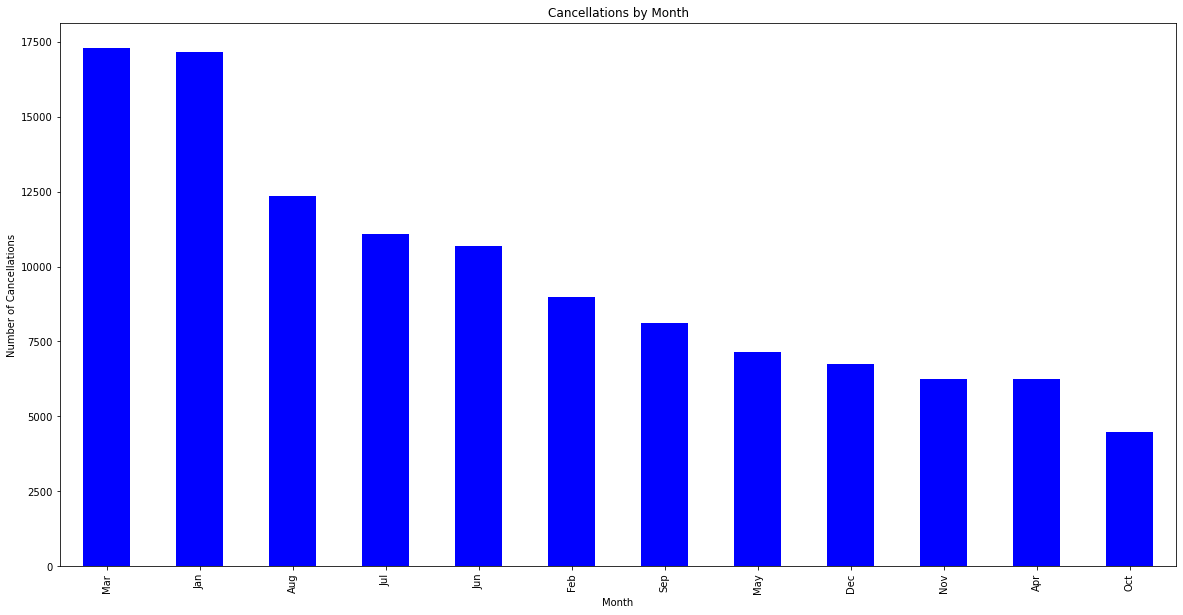

In [35]:
# Number of cancellations by month

total_month_count = data_canceled.groupby(['month'])['month'].count().reset_index(name="count")
total_month_count_descending = total_month_count.sort_values(by = 'count', ascending=0)
total_month_count_descending.plot.bar(x='month', 
                                      y='count', 
                                      xlabel="Month", 
                                      ylabel="Number of Cancellations", 
                                      figsize = (20,10),
                                      color = "blue",
                                      legend=False, 
                                      title = 'Cancellations by Month')

<AxesSubplot:title={'center':'Cancellations by Day of Week'}, xlabel='Day of Week', ylabel='Number of Cancellations'>

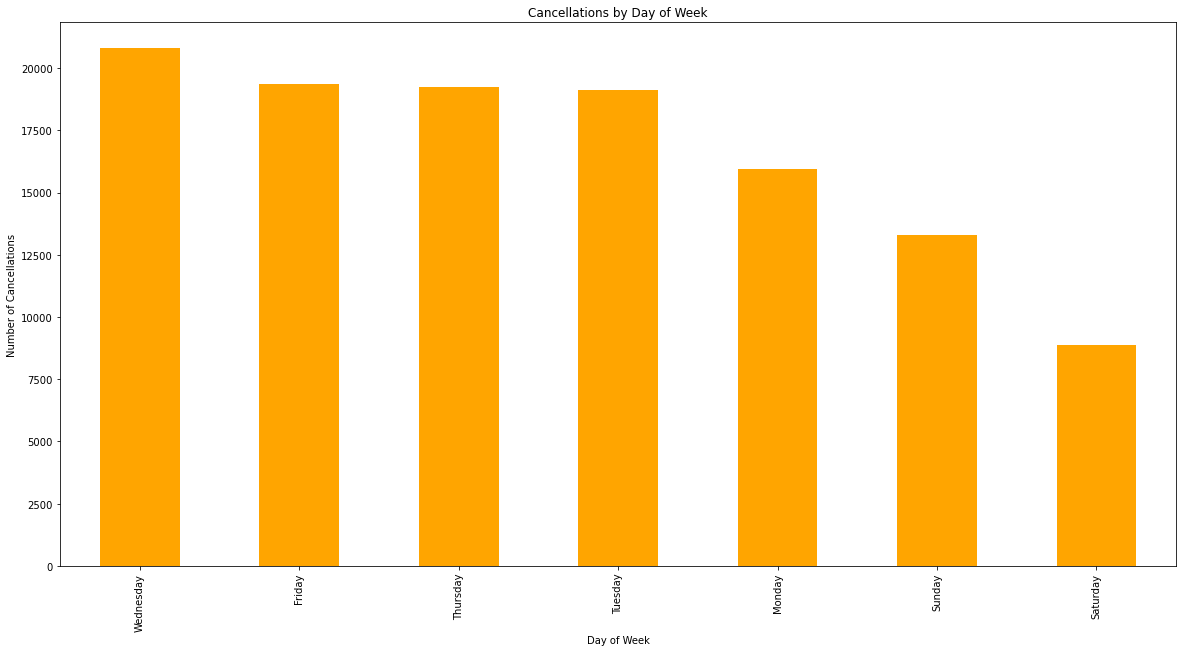

In [36]:
#Number of cancellations by day of week

total_weekday_count = data_canceled.groupby(['weekday'])['weekday'].count().reset_index(name="count")
total_weekday_count_descending = total_weekday_count.sort_values(by = 'count', ascending=0)
total_weekday_count_descending.plot.bar(x='weekday', 
                                        y='count',
                                        xlabel="Day of Week",
                                        ylabel="Number of Cancellations",
                                        figsize = (20,10), 
                                        color = "orange",
                                        legend=False, 
                                        title = 'Cancellations by Day of Week',
                                        
                                        )

<AxesSubplot:title={'center':'Cancellations by Airline Company'}, xlabel='Airline Company', ylabel='Number of Cancellations'>

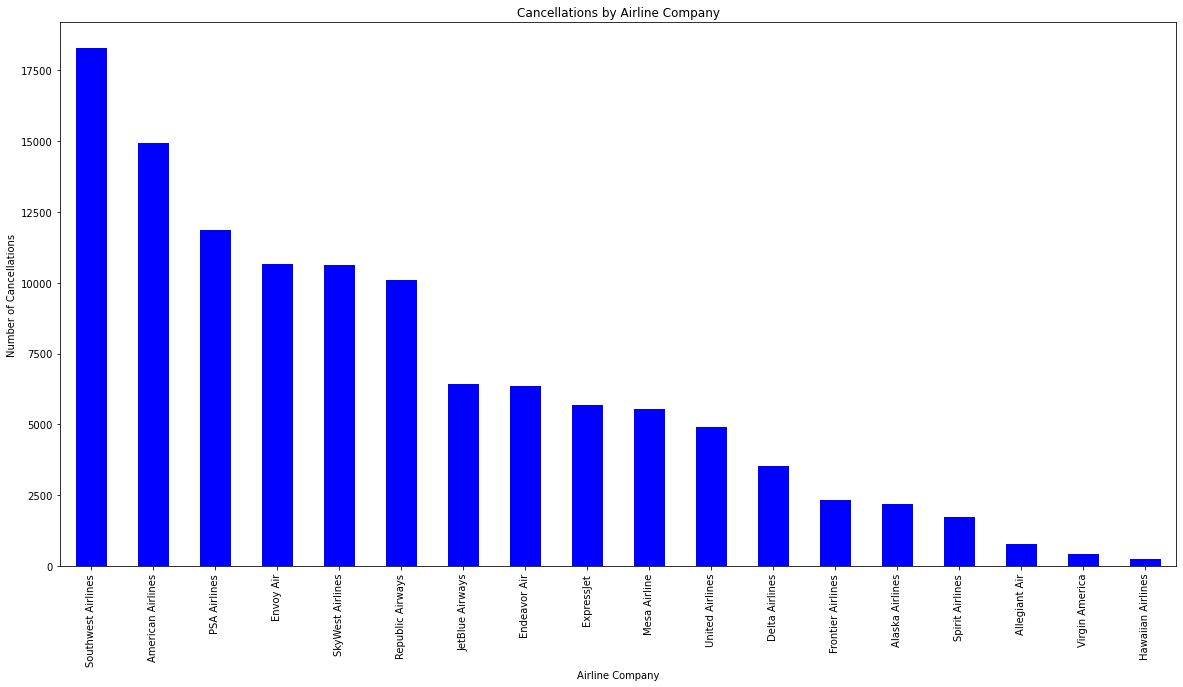

In [37]:
# By airline company

total_airline_count = data_canceled.groupby(['OP_CARRIER'])['OP_CARRIER'].count().reset_index(name="count")
total_airline_count_descending = total_airline_count.sort_values(by = 'count', ascending=0)
total_airline_count_descending.plot.bar(x='OP_CARRIER', 
                                        y='count', 
                                        xlabel="Airline Company", 
                                        ylabel="Number of Cancellations",
                                        figsize = (20,10), 
                                        color = "blue",
                                        legend=False, 
                                        title = 'Cancellations by Airline Company' 
                                        )


<AxesSubplot:title={'center':'Top 20 Cancellations by City Origin'}, xlabel='City Origin', ylabel='Number of Cancellations'>

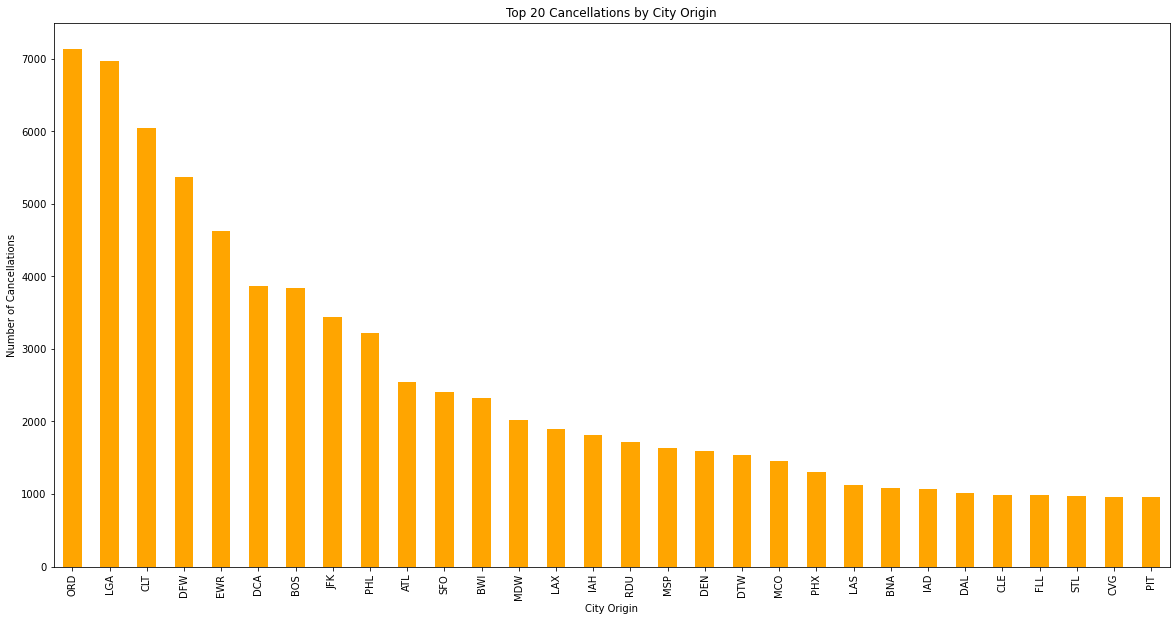

In [38]:
#Number of cancellations by City Origin
total_city_origin_count = data_canceled.groupby(['ORIGIN'])['ORIGIN'].count().reset_index(name="count")
total_city_origin_count_descending = total_city_origin_count.sort_values(by = 'count', ascending=0).head(30)
total_city_origin_count_descending.plot.bar(x='ORIGIN', 
                                            y='count', 
                                            xlabel="City Origin",
                                            ylabel="Number of Cancellations",
                                            figsize = (20,10), 
                                            color = "orange",
                                            legend=False, 
                                            title = 'Top 20 Cancellations by City Origin', 
                                            )


<AxesSubplot:title={'center':'Top 20 Cancellations by City Origin'}, xlabel='City Origin', ylabel='Number of Cancellations'>

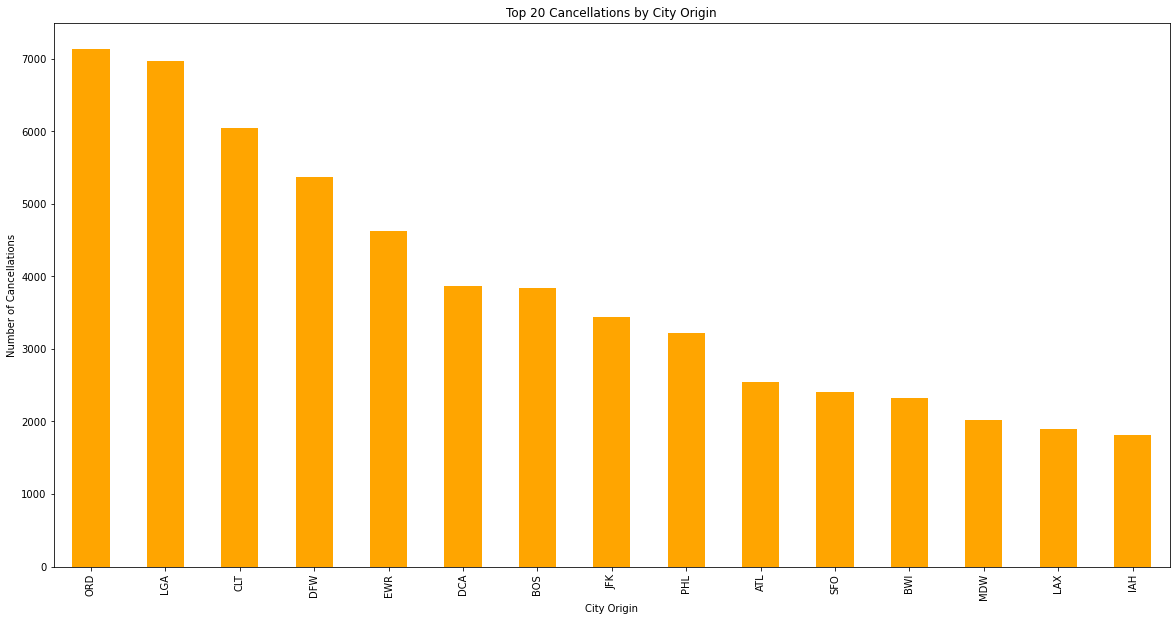

In [39]:
#Top 15 cities

total_city_origin_count = data_canceled.groupby(['ORIGIN'])['ORIGIN'].count().reset_index(name="count")
total_city_origin_count_descending = total_city_origin_count.sort_values(by = 'count', ascending=0).head(15)
total_city_origin_count_descending.plot.bar(x='ORIGIN', 
                                            y='count', 
                                            xlabel="City Origin",
                                            ylabel="Number of Cancellations",
                                            figsize = (20,10), 
                                            color = "orange",
                                            legend=False, 
                                            title = 'Top 20 Cancellations by City Origin', 
                                            )


In [40]:
data_canceled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116584 entries, 178 to 7212773
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   FL_DATE              116584 non-null  object        
 1   OP_CARRIER           116584 non-null  object        
 2   OP_CARRIER_FL_NUM    116584 non-null  int64         
 3   ORIGIN               116584 non-null  object        
 4   DEST                 116584 non-null  object        
 5   CRS_DEP_TIME         116584 non-null  int64         
 6   DEP_TIME             4267 non-null    float64       
 7   DEP_DELAY            4093 non-null    float64       
 8   TAXI_OUT             754 non-null     float64       
 9   WHEELS_OFF           755 non-null     float64       
 10  WHEELS_ON            0 non-null       float64       
 11  TAXI_IN              0 non-null       float64       
 12  CRS_ARR_TIME         116584 non-null  int64         
 13  ARR_TIME   

In [41]:
data_canceled.head(100)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,date,weekday,month
178,2018-01-01,United Airlines,2034,IAH,MFE,1440,NaN,NaN,NaN,NaN,NaN,NaN,1601,NaN,NaN,1.0,B,0.0,81.0,NaN,NaN,316.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
875,2018-01-01,United Airlines,864,LAS,SFO,1744,NaN,NaN,NaN,NaN,NaN,NaN,1926,NaN,NaN,1.0,A,0.0,102.0,NaN,NaN,414.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
1244,2018-01-01,United Airlines,488,MFE,IAH,1726,NaN,NaN,NaN,NaN,NaN,NaN,1844,NaN,NaN,1.0,B,0.0,78.0,NaN,NaN,316.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
1584,2018-01-01,Alaska Airlines,5,DCA,LAX,910,NaN,NaN,NaN,NaN,NaN,NaN,1230,NaN,NaN,1.0,A,0.0,380.0,NaN,NaN,2311.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
1639,2018-01-01,Alaska Airlines,64,WRG,KTN,1623,NaN,NaN,NaN,NaN,NaN,NaN,1655,NaN,NaN,1.0,B,0.0,32.0,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5442,2018-01-01,Envoy Air,3939,DFW,LRD,2220,NaN,NaN,NaN,NaN,NaN,NaN,2346,NaN,NaN,1.0,B,0.0,86.0,NaN,NaN,396.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
5445,2018-01-01,Envoy Air,3941,DFW,LRD,1245,NaN,NaN,NaN,NaN,NaN,NaN,1414,NaN,NaN,1.0,B,0.0,89.0,NaN,NaN,396.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
5446,2018-01-01,Envoy Air,3941,LRD,DFW,1439,NaN,NaN,NaN,NaN,NaN,NaN,1608,NaN,NaN,1.0,B,0.0,89.0,NaN,NaN,396.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
5447,2018-01-01,Envoy Air,3944,LRD,DFW,750,NaN,NaN,NaN,NaN,NaN,NaN,920,NaN,NaN,1.0,B,0.0,90.0,NaN,NaN,396.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan


In [42]:
df.head(100)


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,date,weekday,month
0,2018-01-01,United Airlines,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,NaN,0.0,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
1,2018-01-01,United Airlines,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,NaN,0.0,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
2,2018-01-01,United Airlines,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,NaN,0.0,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
3,2018-01-01,United Airlines,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,NaN,0.0,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
4,2018-01-01,United Airlines,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,NaN,0.0,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2018-01-01,United Airlines,2122,DEN,SJC,2000,1959.0,-1.0,14.0,2013.0,2125.0,6.0,2146,2131.0,-15.0,0.0,NaN,0.0,166.0,152.0,132.0,948.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
96,2018-01-01,United Airlines,2121,IAH,EWR,610,605.0,-5.0,11.0,616.0,1005.0,4.0,1037,1009.0,-28.0,0.0,NaN,0.0,207.0,184.0,169.0,1400.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
97,2018-01-01,United Airlines,2120,LAX,ORD,2356,2350.0,-6.0,16.0,6.0,531.0,3.0,555,534.0,-21.0,0.0,NaN,0.0,239.0,224.0,205.0,1744.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
98,2018-01-01,United Airlines,2119,BNA,SFO,710,707.0,-3.0,17.0,724.0,1012.0,14.0,1020,1026.0,6.0,0.0,NaN,0.0,310.0,319.0,288.0,1969.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7213446 entries, 0 to 7213445
Data columns (total 31 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              object        
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         int64         
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           float64       
 10  WHEELS_ON            float64       
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         int64         
 13  ARR_TIME             float64       
 14  ARR_DELAY            float64       
 15  CANCELLED            float64       
 16  CANCELLATION_CODE    object        
 17  DIVERTED             float64       
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME  

In [44]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7213446 entries, 0 to 7213445
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   FL_DATE              7213446 non-null  object        
 1   OP_CARRIER           7213446 non-null  object        
 2   OP_CARRIER_FL_NUM    7213446 non-null  int64         
 3   ORIGIN               7213446 non-null  object        
 4   DEST                 7213446 non-null  object        
 5   CRS_DEP_TIME         7213446 non-null  int64         
 6   DEP_TIME             7101129 non-null  float64       
 7   DEP_DELAY            7096212 non-null  float64       
 8   TAXI_OUT             7097616 non-null  float64       
 9   WHEELS_OFF           7097617 non-null  float64       
 10  WHEELS_ON            7094200 non-null  float64       
 11  TAXI_IN              7094200 non-null  float64       
 12  CRS_ARR_TIME         7213446 non-null  int64         
 1

In [45]:
df_nulls = pd.Series(df.info(show_counts=True),name='df_nulls')
df_nulls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7213446 entries, 0 to 7213445
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   FL_DATE              7213446 non-null  object        
 1   OP_CARRIER           7213446 non-null  object        
 2   OP_CARRIER_FL_NUM    7213446 non-null  int64         
 3   ORIGIN               7213446 non-null  object        
 4   DEST                 7213446 non-null  object        
 5   CRS_DEP_TIME         7213446 non-null  int64         
 6   DEP_TIME             7101129 non-null  float64       
 7   DEP_DELAY            7096212 non-null  float64       
 8   TAXI_OUT             7097616 non-null  float64       
 9   WHEELS_OFF           7097617 non-null  float64       
 10  WHEELS_ON            7094200 non-null  float64       
 11  TAXI_IN              7094200 non-null  float64       
 12  CRS_ARR_TIME         7213446 non-null  int64         
 1

Series([], Name: df_nulls, dtype: float64)

In [46]:
df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,date,weekday,month
0,2018-01-01,United Airlines,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,NaN,0.0,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
1,2018-01-01,United Airlines,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,NaN,0.0,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
2,2018-01-01,United Airlines,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,NaN,0.0,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
3,2018-01-01,United Airlines,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,NaN,0.0,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
4,2018-01-01,United Airlines,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,NaN,0.0,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7213441,2018-12-31,American Airlines,1815,DCA,CLT,1534,1530.0,-4.0,20.0,1550.0,1702.0,7.0,1714,1709.0,-5.0,0.0,NaN,0.0,100.0,99.0,72.0,331.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-31,Monday,Dec
7213442,2018-12-31,American Airlines,1816,CLT,DFW,1751,1757.0,6.0,18.0,1815.0,1943.0,10.0,1952,1953.0,1.0,0.0,NaN,0.0,181.0,176.0,148.0,936.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-31,Monday,Dec
7213443,2018-12-31,American Airlines,1817,CLT,MEM,2015,2010.0,-5.0,36.0,2046.0,2114.0,4.0,2107,2118.0,11.0,0.0,NaN,0.0,112.0,128.0,88.0,511.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-31,Monday,Dec
7213444,2018-12-31,American Airlines,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,1400.0,4.0,1350,1404.0,14.0,0.0,NaN,0.0,50.0,41.0,26.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-31,Monday,Dec


In [47]:
#df.to_csv('2018_new.csv')

In [48]:
m='file:///Users/khajan/Library/CloudStorage/OneDrive-NortheasternUniversity/Post Admittance/000 Fall Semester 2022 finale/DAMG7250/Group Project/2018_new.csv'

In [49]:
m[76]

's'

In [50]:
m[77]

't'

In [51]:
m[60:80]

'ernUniversity/Post A'

In [52]:
df.columns

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 27', 'date', 'weekday', 'month'],
      dtype='object')

In [53]:
df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,date,weekday,month
0,2018-01-01,United Airlines,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,NaN,0.0,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
1,2018-01-01,United Airlines,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,NaN,0.0,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
2,2018-01-01,United Airlines,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,NaN,0.0,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
3,2018-01-01,United Airlines,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,NaN,0.0,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
4,2018-01-01,United Airlines,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,NaN,0.0,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,Monday,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7213441,2018-12-31,American Airlines,1815,DCA,CLT,1534,1530.0,-4.0,20.0,1550.0,1702.0,7.0,1714,1709.0,-5.0,0.0,NaN,0.0,100.0,99.0,72.0,331.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-31,Monday,Dec
7213442,2018-12-31,American Airlines,1816,CLT,DFW,1751,1757.0,6.0,18.0,1815.0,1943.0,10.0,1952,1953.0,1.0,0.0,NaN,0.0,181.0,176.0,148.0,936.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-31,Monday,Dec
7213443,2018-12-31,American Airlines,1817,CLT,MEM,2015,2010.0,-5.0,36.0,2046.0,2114.0,4.0,2107,2118.0,11.0,0.0,NaN,0.0,112.0,128.0,88.0,511.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-31,Monday,Dec
7213444,2018-12-31,American Airlines,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,1400.0,4.0,1350,1404.0,14.0,0.0,NaN,0.0,50.0,41.0,26.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-31,Monday,Dec


#### Arrival and departure delays by month of the year

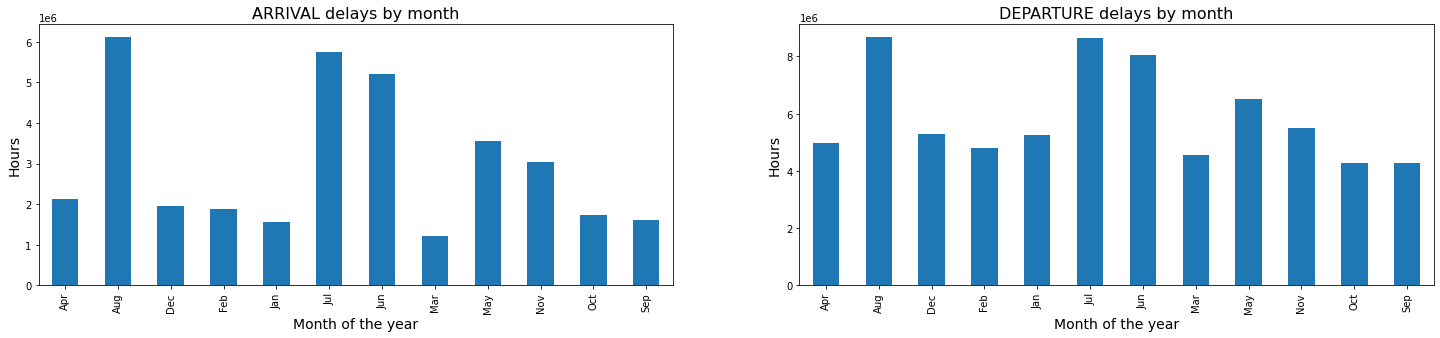

In [54]:

# Arrival and departure delays by month of the year
plt.figure(figsize=(25, 12)).subplots_adjust(hspace = 0.5)

plt.subplot(2, 2 ,1)
df.groupby('month').ARR_DELAY.sum().plot.bar().set_title('ARRIVAL delays by month')
plt.title('ARRIVAL delays by month', fontsize=16)
plt.ylabel('Hours', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)

plt.subplot(2, 2 ,2)
df.groupby('month').DEP_DELAY.sum().plot.bar()
plt.title('DEPARTURE delays by month', fontsize=16)
plt.ylabel('Hours', fontsize=14)
plt.xlabel('Month of the year', fontsize=14)

plt.show()

### MISSINGNO

<AxesSubplot:>

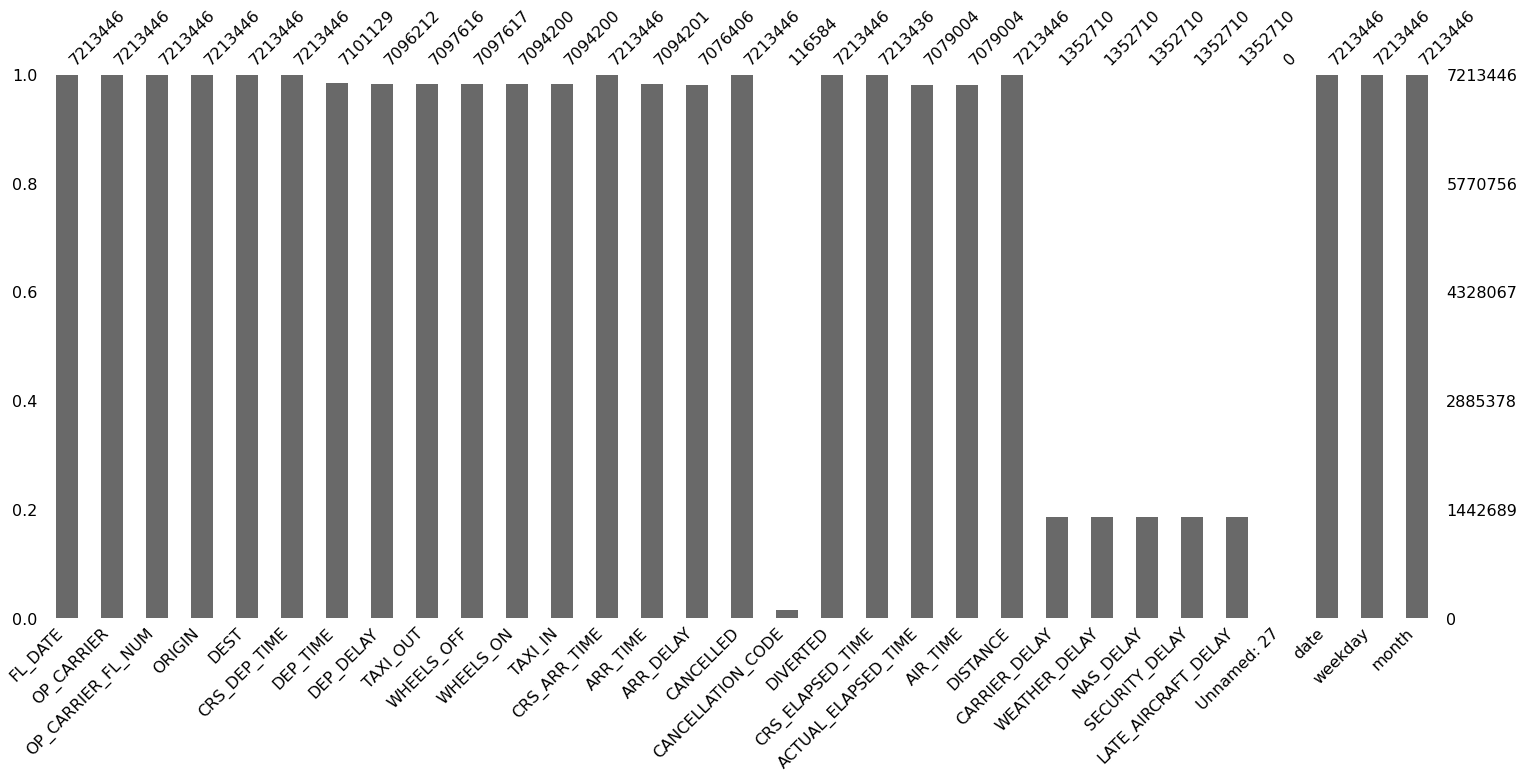

In [55]:
msno.bar(df)

In [56]:
df.shape

(7213446, 31)

In [57]:
df.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                112317
DEP_DELAY               117234
TAXI_OUT                115830
WHEELS_OFF              115829
WHEELS_ON               119246
TAXI_IN                 119246
CRS_ARR_TIME                 0
ARR_TIME                119245
ARR_DELAY               137040
CANCELLED                    0
CANCELLATION_CODE      7096862
DIVERTED                     0
CRS_ELAPSED_TIME            10
ACTUAL_ELAPSED_TIME     134442
AIR_TIME                134442
DISTANCE                     0
CARRIER_DELAY          5860736
WEATHER_DELAY          5860736
NAS_DELAY              5860736
SECURITY_DELAY         5860736
LATE_AIRCRAFT_DELAY    5860736
Unnamed: 27            7213446
date                         0
weekday                      0
month                        0
dtype: int64

<AxesSubplot:>

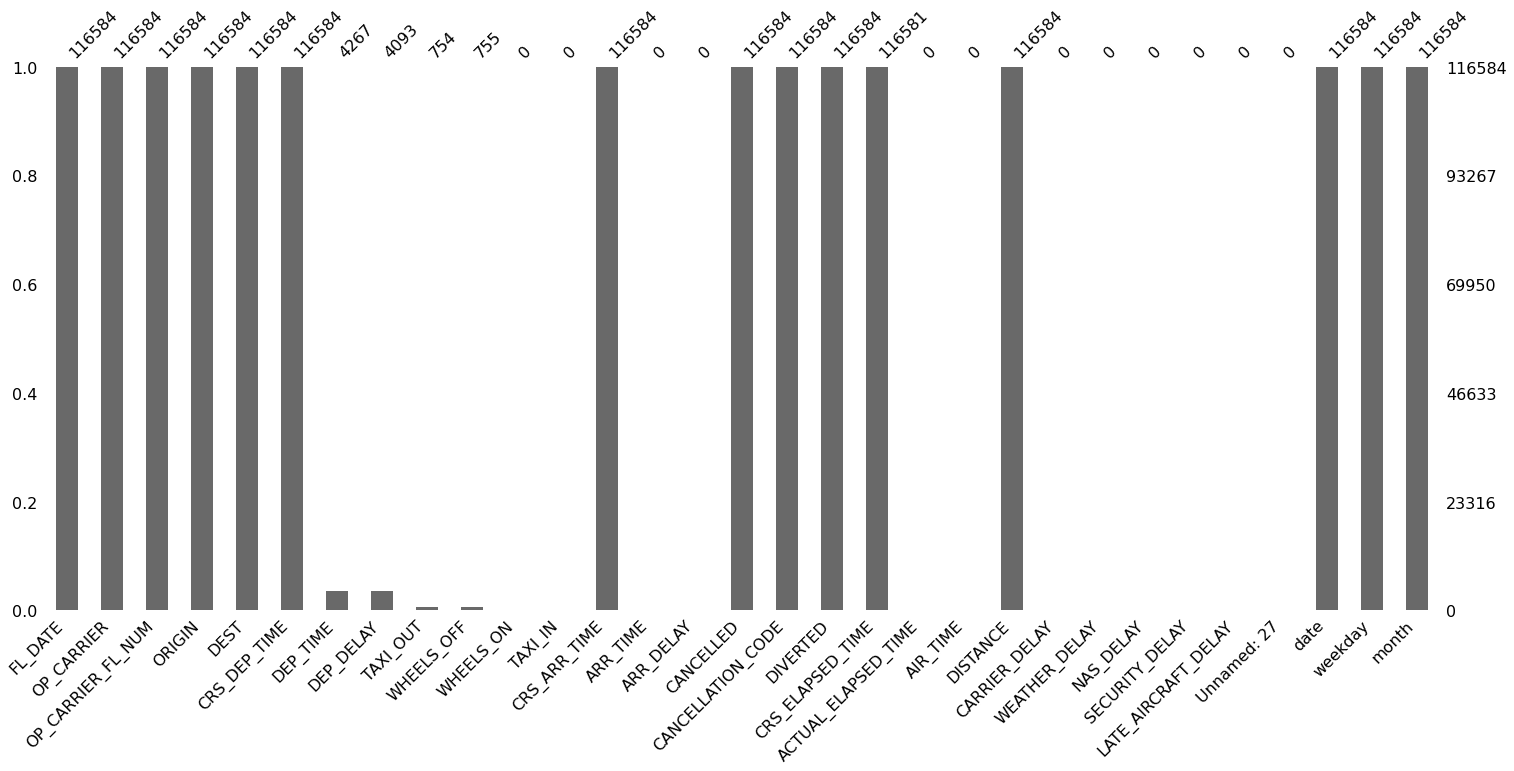

In [58]:
msno.bar(data_canceled)

In [59]:
data_canceled.shape

(116584, 31)

In [60]:
data_canceled.isnull().sum()

FL_DATE                     0
OP_CARRIER                  0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME               112317
DEP_DELAY              112491
TAXI_OUT               115830
WHEELS_OFF             115829
WHEELS_ON              116584
TAXI_IN                116584
CRS_ARR_TIME                0
ARR_TIME               116584
ARR_DELAY              116584
CANCELLED                   0
CANCELLATION_CODE           0
DIVERTED                    0
CRS_ELAPSED_TIME            3
ACTUAL_ELAPSED_TIME    116584
AIR_TIME               116584
DISTANCE                    0
CARRIER_DELAY          116584
WEATHER_DELAY          116584
NAS_DELAY              116584
SECURITY_DELAY         116584
LATE_AIRCRAFT_DELAY    116584
Unnamed: 27            116584
date                        0
weekday                     0
month                       0
dtype: int64

<AxesSubplot:>

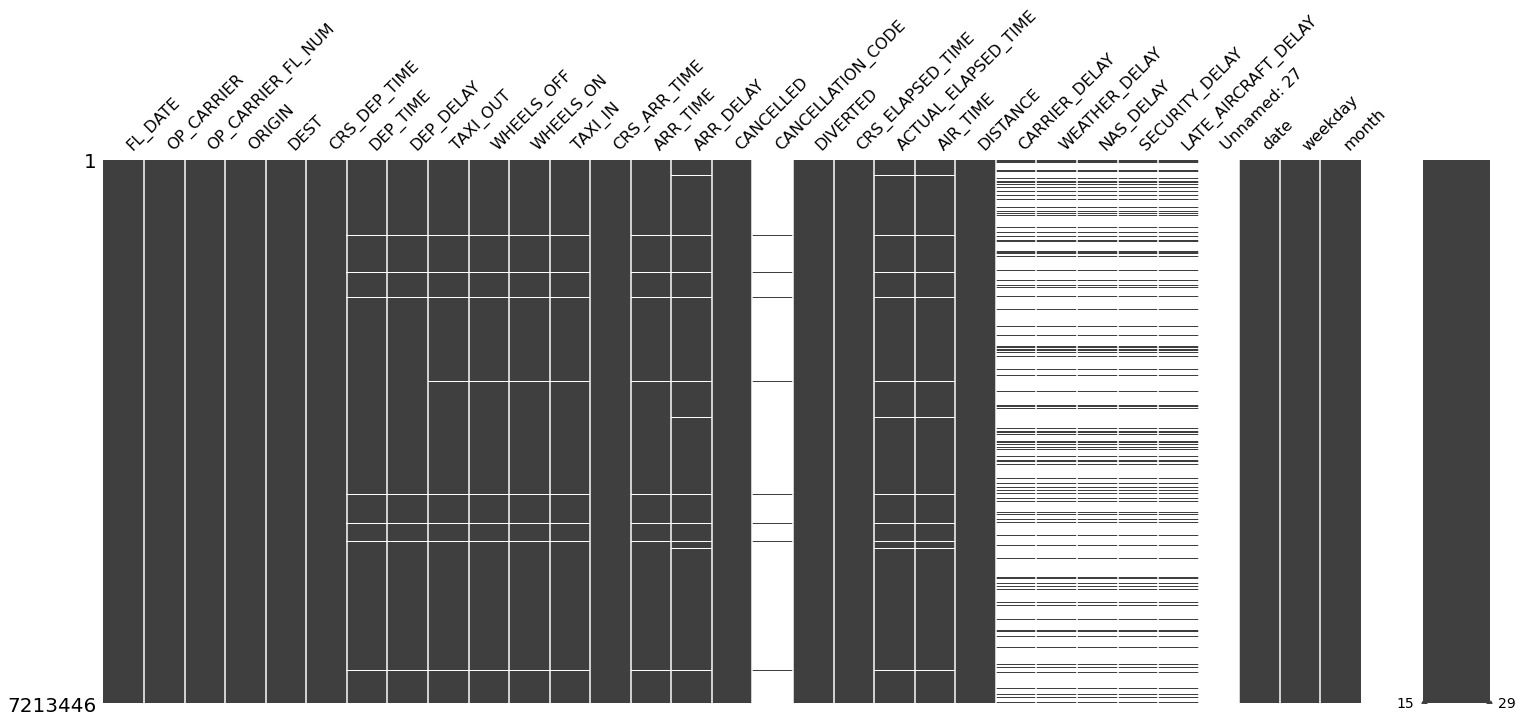

In [61]:
# positional information of the missing values
msno.matrix(df)

<AxesSubplot:>

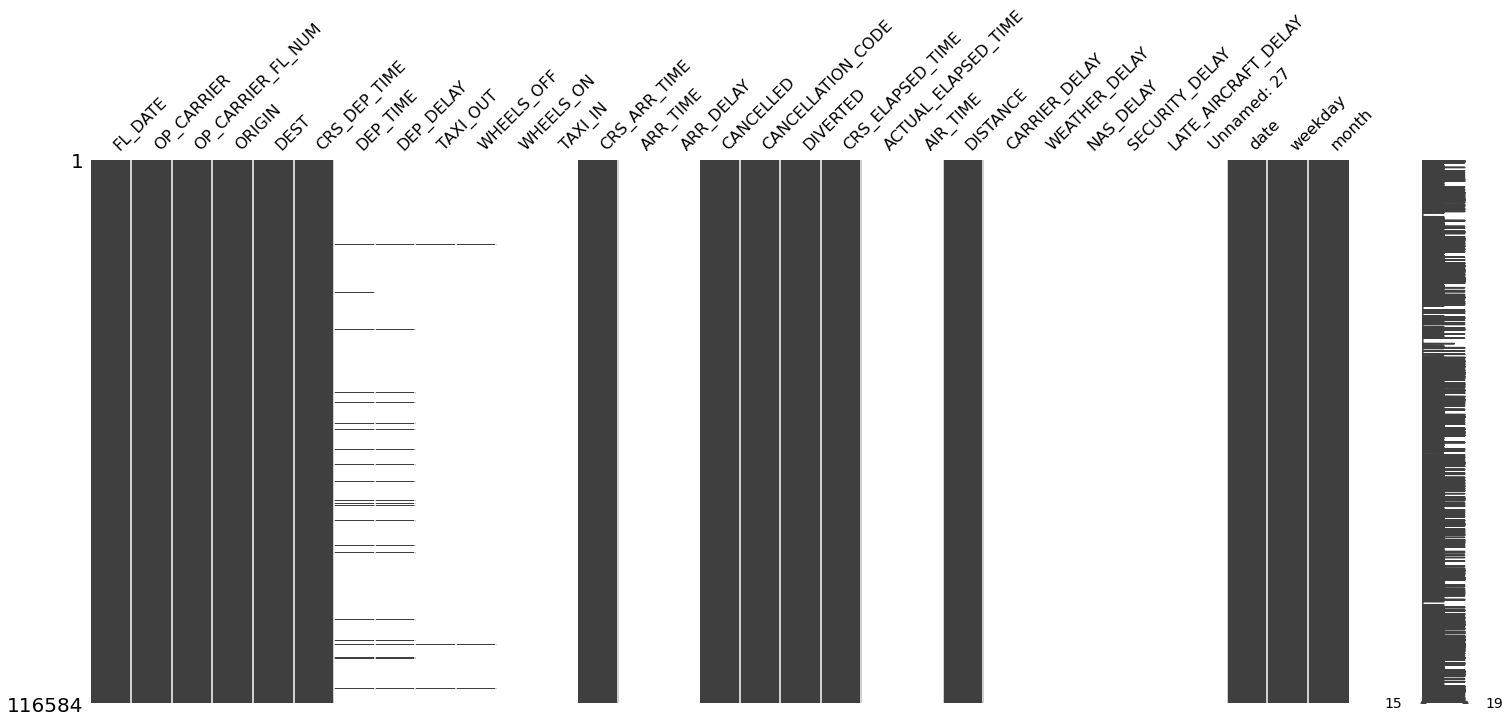

In [62]:
# positional information of the missing values
msno.matrix(data_canceled)

<AxesSubplot:>

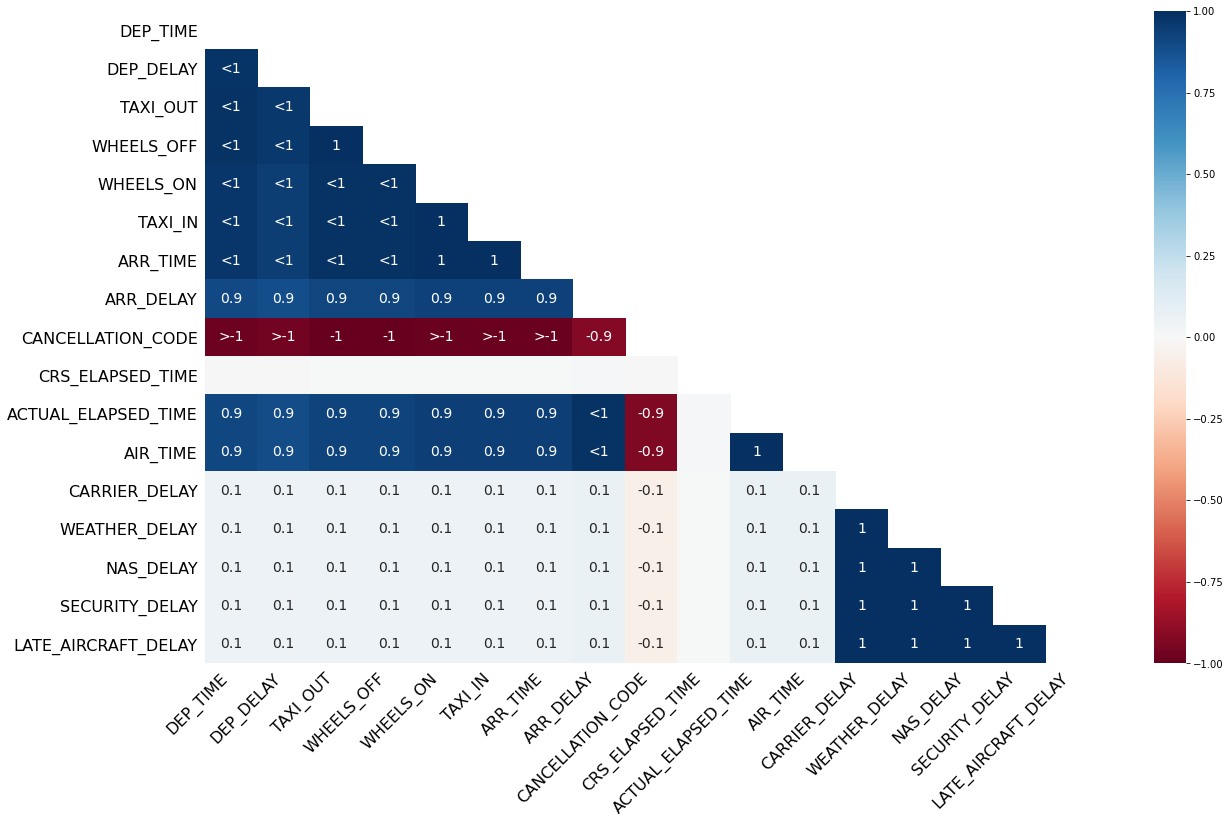

In [63]:
# heatmap of how missing values are related
msno.heatmap(df)

<AxesSubplot:>

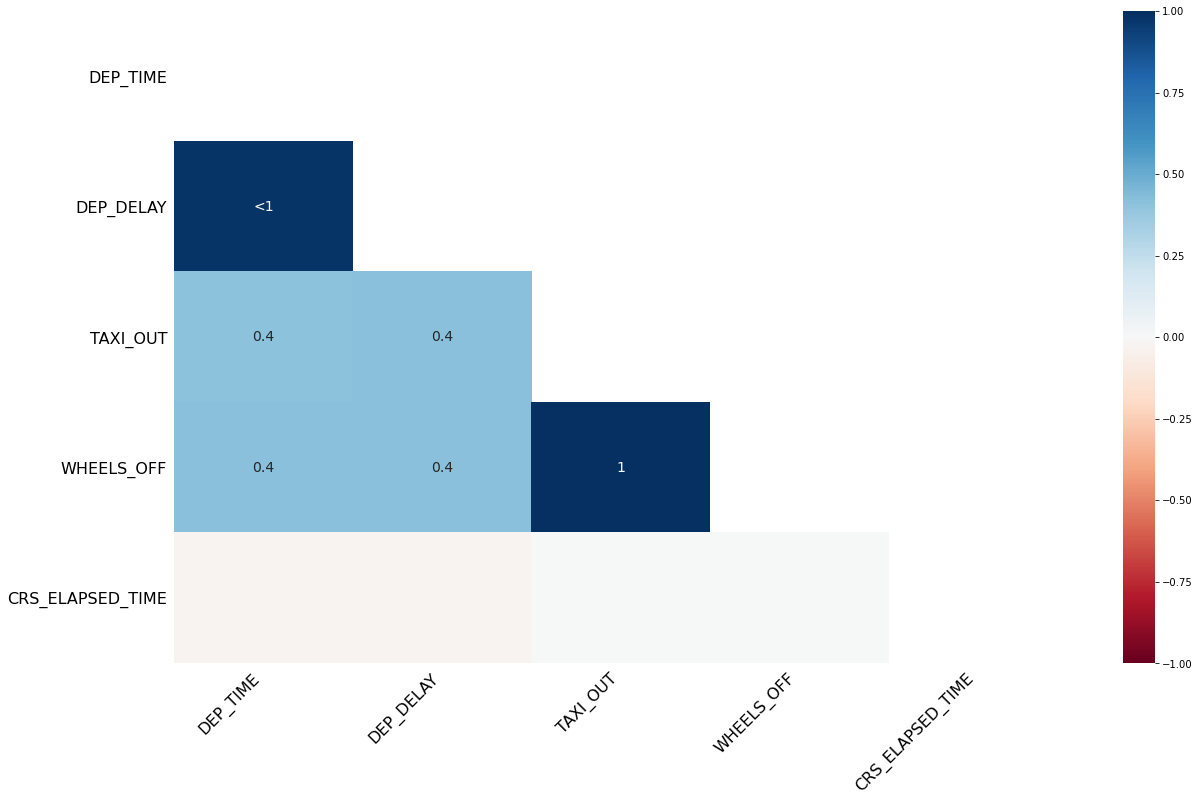

In [64]:
# heatmap of how missing values are related
msno.heatmap(data_canceled)

### Handling missing data

In [65]:
df_ifnull = pd.Series(df.isna().any(),name='df_ifnull')
df_ifnull

FL_DATE                False
OP_CARRIER             False
OP_CARRIER_FL_NUM      False
ORIGIN                 False
DEST                   False
CRS_DEP_TIME           False
DEP_TIME                True
DEP_DELAY               True
TAXI_OUT                True
WHEELS_OFF              True
WHEELS_ON               True
TAXI_IN                 True
CRS_ARR_TIME           False
ARR_TIME                True
ARR_DELAY               True
CANCELLED              False
CANCELLATION_CODE       True
DIVERTED               False
CRS_ELAPSED_TIME        True
ACTUAL_ELAPSED_TIME     True
AIR_TIME                True
DISTANCE               False
CARRIER_DELAY           True
WEATHER_DELAY           True
NAS_DELAY               True
SECURITY_DELAY          True
LATE_AIRCRAFT_DELAY     True
Unnamed: 27             True
date                   False
weekday                False
month                  False
Name: df_ifnull, dtype: bool

In [66]:
dc_ifnull = pd.Series(data_canceled.isna().any(),name='dc_ifnull')

In [67]:
dfifnull = pd.merge(df_ifnull, dc_ifnull, right_index = True,
               left_index = True)
dfifnull

,df_ifnull,dc_ifnull
FL_DATE,False,False
OP_CARRIER,False,False
OP_CARRIER_FL_NUM,False,False
ORIGIN,False,False
DEST,False,False
CRS_DEP_TIME,False,False
DEP_TIME,True,True
DEP_DELAY,True,True
TAXI_OUT,True,True
WHEELS_OFF,True,True


In [68]:

df['CARRIER_DELAY'] = df['CARRIER_DELAY'].fillna(0)
df['NAS_DELAY'] = df['NAS_DELAY'].fillna(0)
df['SECURITY_DELAY'] = df['SECURITY_DELAY'].fillna(0)
df['LATE_AIRCRAFT_DELAY'] = df['LATE_AIRCRAFT_DELAY'].fillna(0)
df['WEATHER_DELAY'] = df['WEATHER_DELAY'].fillna(0)


In [69]:


df.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                112317
DEP_DELAY               117234
TAXI_OUT                115830
WHEELS_OFF              115829
WHEELS_ON               119246
TAXI_IN                 119246
CRS_ARR_TIME                 0
ARR_TIME                119245
ARR_DELAY               137040
CANCELLED                    0
CANCELLATION_CODE      7096862
DIVERTED                     0
CRS_ELAPSED_TIME            10
ACTUAL_ELAPSED_TIME     134442
AIR_TIME                134442
DISTANCE                     0
CARRIER_DELAY                0
WEATHER_DELAY                0
NAS_DELAY                    0
SECURITY_DELAY               0
LATE_AIRCRAFT_DELAY          0
Unnamed: 27            7213446
date                         0
weekday                      0
month                        0
dtype: int64

In [70]:
df.columns

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 27', 'date', 'weekday', 'month'],
      dtype='object')

In [71]:
df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,date,weekday,month
0,2018-01-01,United Airlines,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,NaN,0.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,NaN,2018-01-01,Monday,Jan
1,2018-01-01,United Airlines,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,NaN,0.0,99.0,83.0,65.0,414.0,0.0,0.0,0.0,0.0,0.0,NaN,2018-01-01,Monday,Jan
2,2018-01-01,United Airlines,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,NaN,0.0,134.0,126.0,106.0,846.0,0.0,0.0,0.0,0.0,0.0,NaN,2018-01-01,Monday,Jan
3,2018-01-01,United Airlines,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,NaN,0.0,190.0,182.0,157.0,1120.0,0.0,0.0,0.0,0.0,0.0,NaN,2018-01-01,Monday,Jan
4,2018-01-01,United Airlines,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,NaN,0.0,112.0,106.0,83.0,723.0,0.0,0.0,0.0,0.0,0.0,NaN,2018-01-01,Monday,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7213441,2018-12-31,American Airlines,1815,DCA,CLT,1534,1530.0,-4.0,20.0,1550.0,1702.0,7.0,1714,1709.0,-5.0,0.0,NaN,0.0,100.0,99.0,72.0,331.0,0.0,0.0,0.0,0.0,0.0,NaN,2018-12-31,Monday,Dec
7213442,2018-12-31,American Airlines,1816,CLT,DFW,1751,1757.0,6.0,18.0,1815.0,1943.0,10.0,1952,1953.0,1.0,0.0,NaN,0.0,181.0,176.0,148.0,936.0,0.0,0.0,0.0,0.0,0.0,NaN,2018-12-31,Monday,Dec
7213443,2018-12-31,American Airlines,1817,CLT,MEM,2015,2010.0,-5.0,36.0,2046.0,2114.0,4.0,2107,2118.0,11.0,0.0,NaN,0.0,112.0,128.0,88.0,511.0,0.0,0.0,0.0,0.0,0.0,NaN,2018-12-31,Monday,Dec
7213444,2018-12-31,American Airlines,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,1400.0,4.0,1350,1404.0,14.0,0.0,NaN,0.0,50.0,41.0,26.0,130.0,0.0,0.0,0.0,0.0,0.0,NaN,2018-12-31,Monday,Dec


In [72]:


df.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                112317
DEP_DELAY               117234
TAXI_OUT                115830
WHEELS_OFF              115829
WHEELS_ON               119246
TAXI_IN                 119246
CRS_ARR_TIME                 0
ARR_TIME                119245
ARR_DELAY               137040
CANCELLED                    0
CANCELLATION_CODE      7096862
DIVERTED                     0
CRS_ELAPSED_TIME            10
ACTUAL_ELAPSED_TIME     134442
AIR_TIME                134442
DISTANCE                     0
CARRIER_DELAY                0
WEATHER_DELAY                0
NAS_DELAY                    0
SECURITY_DELAY               0
LATE_AIRCRAFT_DELAY          0
Unnamed: 27            7213446
date                         0
weekday                      0
month                        0
dtype: int64

In [73]:
## replacing all other nulls with 0
df.fillna(0,inplace=True)

In [74]:


df.isnull().sum()

FL_DATE                0
OP_CARRIER             0
OP_CARRIER_FL_NUM      0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CANCELLED              0
CANCELLATION_CODE      0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
Unnamed: 27            0
date                   0
weekday                0
month                  0
dtype: int64

In [75]:
airline_rank_v01 = pd.DataFrame({'flight_volume' : df.groupby(['OP_CARRIER'])['OP_CARRIER_FL_NUM'].count()}).reset_index()
airline_rank_v01.sort_values("flight_volume", ascending=True, inplace=True)
flight_volume_total = airline_rank_v01['flight_volume'].sum()
airline_rank_v01['flight_pcnt'] = airline_rank_v01['flight_volume']/flight_volume_total
airline_rank_v02 = pd.DataFrame({'cancellation_rate' : df.groupby(['OP_CARRIER'])['CANCELLED'].mean()}).reset_index()
airline_rank_v02.sort_values("cancellation_rate", ascending=False, inplace=True)
airline_rank_v03 = pd.DataFrame({'divertion_rate' : df.groupby(['OP_CARRIER'])['DIVERTED'].mean()}).reset_index()
airline_rank_v03.sort_values("divertion_rate", ascending=False, inplace=True)
airline_rank_v1 = pd.merge(airline_rank_v01, airline_rank_v02, left_on='OP_CARRIER', right_on='OP_CARRIER', how='left')
airline_rank_v1 = pd.merge(airline_rank_v1, airline_rank_v03, left_on='OP_CARRIER', right_on='OP_CARRIER', how='left')
airline_rank_v1

,OP_CARRIER,flight_volume,flight_pcnt,cancellation_rate,divertion_rate
0,Virgin America,17670,0.002450,0.024505,0.004754
1,Hawaiian Airlines,83723,0.011607,0.002986,0.001171
2,Allegiant Air,96221,0.013339,0.007992,0.002702
3,Frontier Airlines,120035,0.016640,0.019394,0.001541
4,Spirit Airlines,176178,0.024424,0.009859,0.001771
5,ExpressJet,202890,0.028127,0.027946,0.003140
6,Mesa Airline,215138,0.029825,0.025704,0.002394
7,Alaska Airlines,245761,0.034070,0.008980,0.002340
8,Endeavor Air,245917,0.034091,0.025842,0.002277
9,PSA Airlines,278457,0.038602,0.042628,0.002884


### Taxi-in & Taxi-out Time

[Text(0.5, 0, 'taxi_time (taxi_in: blue, taxi_out: green)')]

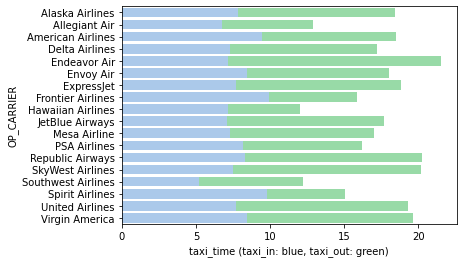

In [76]:

airline_rank_v04 = pd.DataFrame({'taxi_out_time' : df.groupby(['OP_CARRIER'])['TAXI_OUT'].mean()}).reset_index()
airline_rank_v05 = pd.DataFrame({'taxi_in_time' : df.groupby(['OP_CARRIER'])['TAXI_IN'].mean()}).reset_index()
ax = plt.subplots()
sns.set_color_codes("pastel")
sns.set_context("notebook", font_scale=1.5)
ax = sns.barplot(x="taxi_out_time", y="OP_CARRIER", data=airline_rank_v04, color="g")
ax = sns.barplot(x="taxi_in_time", y="OP_CARRIER", data=airline_rank_v05, color="b")
ax.set(xlabel="taxi_time (taxi_in: blue, taxi_out: green)")


### Airline Flight Speed (miles/hour)

In [77]:
df['DISTANCE']/df['AIR_TIME']

0          7.133333
1          6.369231
2          7.981132
3          7.133758
4          8.710843
             ...   
7213441    4.597222
7213442    6.324324
7213443    5.806818
7213444    5.000000
7213445    2.954545
Length: 7213446, dtype: float64

In [78]:
df['AIR_TIME'].min()

0.0

In [79]:
df['AIR_TIME']==0

0          False
1          False
2          False
3          False
4          False
           ...  
7213441    False
7213442    False
7213443    False
7213444    False
7213445    False
Name: AIR_TIME, Length: 7213446, dtype: bool

In [80]:
df['AIR_TIME']

0          225.0
1           65.0
2          106.0
3          157.0
4           83.0
           ...  
7213441     72.0
7213442    148.0
7213443     88.0
7213444     26.0
7213445     44.0
Name: AIR_TIME, Length: 7213446, dtype: float64

### Arrival & Departure Delays

[Text(0.5, 0, 'delay_time (arrival: red, departure: blue)')]

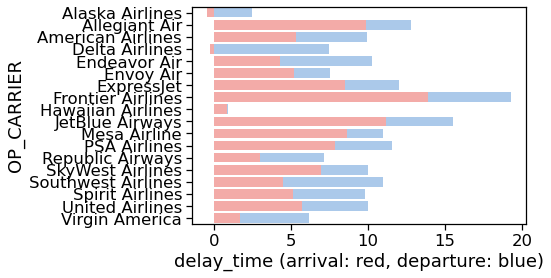

In [82]:

airline_rank_v07 = pd.DataFrame({'avg_arrival_delay' : df.groupby(['OP_CARRIER'])['ARR_DELAY'].mean()}).reset_index()
airline_rank_v08 = pd.DataFrame({'avg_departure_delay' : df.groupby(['OP_CARRIER'])['DEP_DELAY'].mean()}).reset_index()
airline_rank_v1 = pd.merge(airline_rank_v1, airline_rank_v07, left_on='OP_CARRIER', right_on='OP_CARRIER', how='left')
airline_rank_v1 = pd.merge(airline_rank_v1, airline_rank_v08, left_on='OP_CARRIER', right_on='OP_CARRIER', how='left')
ax = sns.set_color_codes("pastel")
sns.set_context("notebook", font_scale=1.5)
ax = sns.barplot(x="avg_departure_delay", y="OP_CARRIER", data=airline_rank_v08,
            label="accuracy", color="b")
ax = sns.barplot(x="avg_arrival_delay", y="OP_CARRIER", data=airline_rank_v07,
            label="accuracy", color="r")
ax.set(xlabel="delay_time (arrival: red, departure: blue)")

## Flight Volume, Cancellation & Divertion Rate

In [83]:
airports = pd.read_csv('airports.csv')

In [84]:
airports

,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872
4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228
...,...,...,...,...,...,...,...
336,WRG,Wrangell,Wrangell,AK,USA,56.484326,-132.369824
337,WYS,Yellowstone,West Yellowstone,MT,USA,44.688399,-111.117638
338,XNA,Northwest Arkansas Regional,Fayetteville Springdale Rogers,AR,USA,36.281869,-94.306811
339,YAK,Yakutat,Yakutat,AK,USA,59.503361,-139.660226


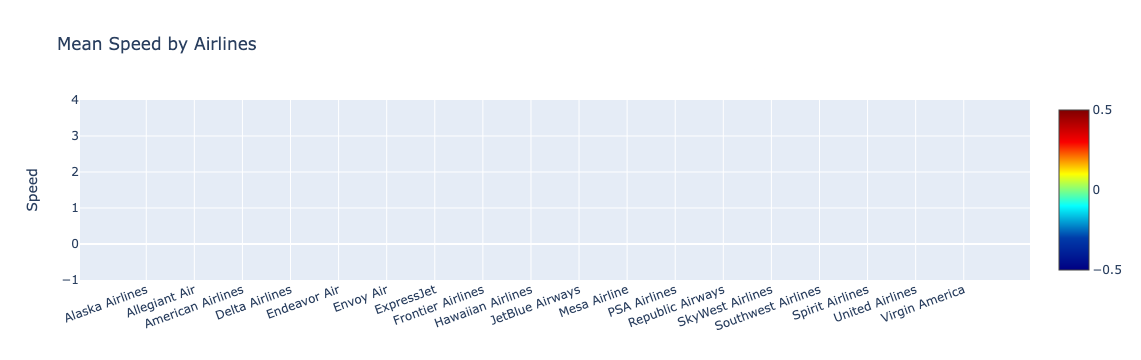

In [86]:
df['SPEED'] = 60*df['DISTANCE']/df['AIR_TIME']
dff = df.groupby('OP_CARRIER').SPEED.mean().to_frame().sort_values(by='SPEED',
                                                    ascending=False).round(2)

trace = go.Scatter(
    x=dff.index,
    y=dff.SPEED,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 30,
        color = dff.SPEED.values,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(xaxis=dict(tickangle=-20),
    title='Mean Speed by Airlines', 
                   yaxis = dict(title = 'Speed')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

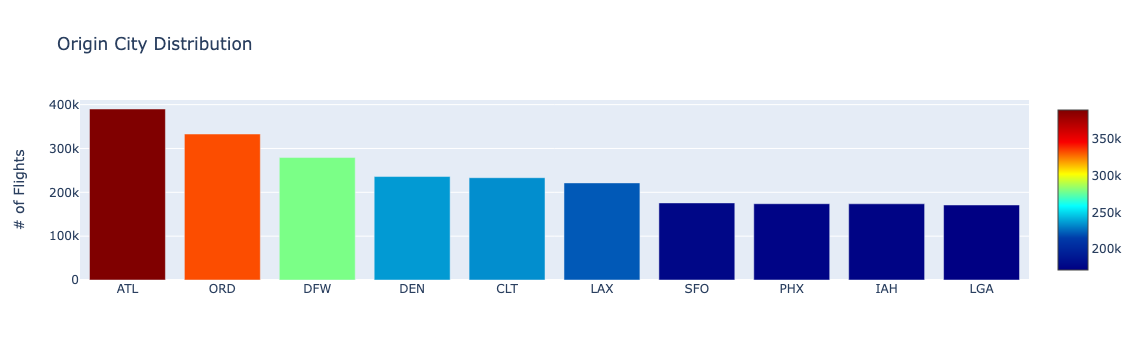

In [87]:
dff = df.ORIGIN.value_counts()[:10]

trace = go.Bar(
    x=dff.index,
    y=dff.values,
    marker=dict(
        color = dff.values,
        colorscale='Jet',
        showscale=True
    )
)

data = [trace]
layout = go.Layout(
    title='Origin City Distribution', 
    yaxis = dict(title = '# of Flights')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


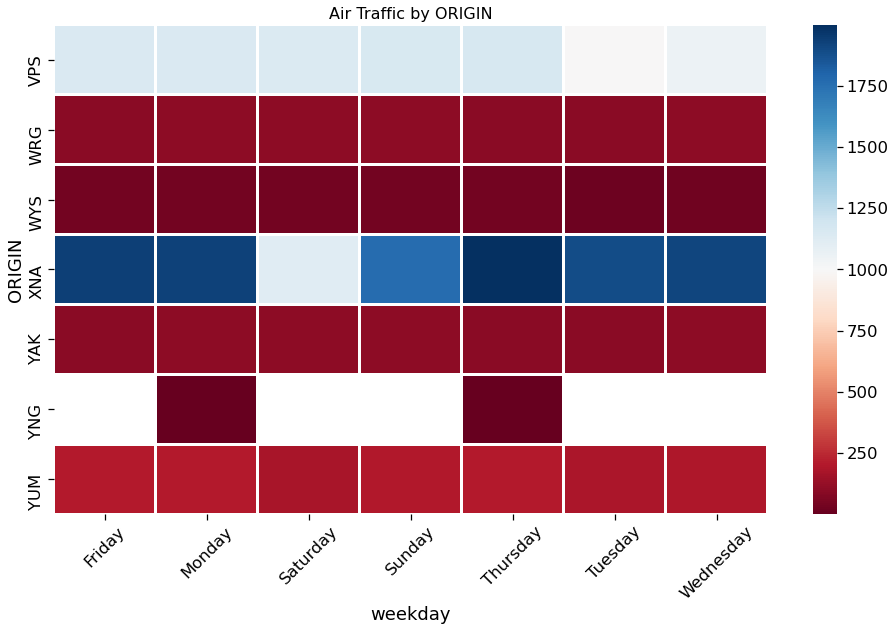

In [88]:
flight_volume = df.pivot_table(index="ORIGIN",columns="weekday",
                               values="date",aggfunc=lambda x:x.count())
fv = flight_volume.sort_values(by="ORIGIN", ascending=False)[:7]
fv = fv.iloc[::-1]

fig = plt.figure(figsize=(16,9))
sns.heatmap(fv, cmap='RdBu',linecolor="w", linewidths=2)

plt.title('Air Traffic by ORIGIN',size=16)
plt.ylabel('ORIGIN')
plt.xticks(rotation=45)
plt.show()

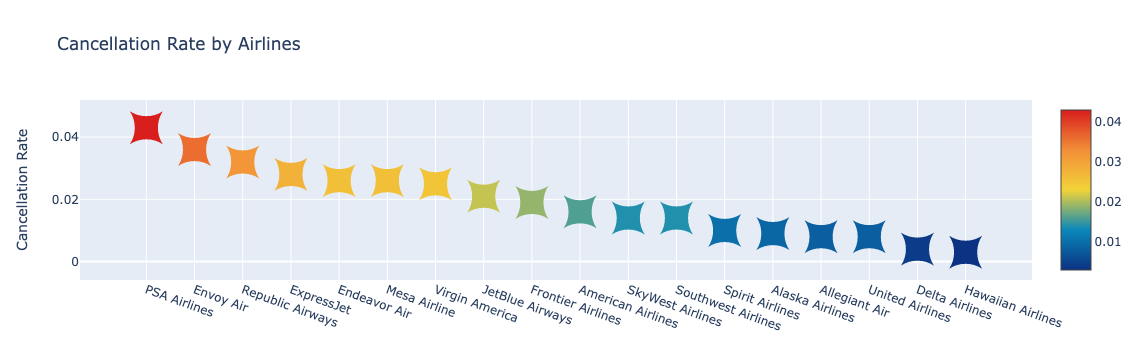

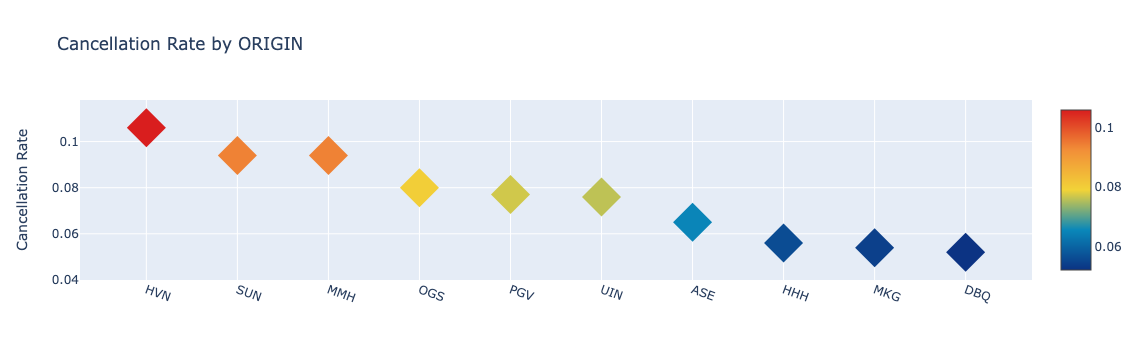

In [89]:
dff = df.groupby('OP_CARRIER')[['CANCELLED']].mean().sort_values(by='CANCELLED', 
                                                    ascending=False).round(3)

trace1 = go.Scatter(
    x=dff.index,
    y=dff.CANCELLED,
    mode='markers',
    marker=dict(
        symbol = 'star-square',
        sizemode = 'diameter',
        sizeref = 1,
        size = 30,
        color = dff.CANCELLED,
        colorscale='Portland',
        showscale=True
    )
)

data = [trace1]
layout = go.Layout(xaxis=dict(tickangle=20),
    title='Cancellation Rate by Airlines', yaxis = dict(title = 'Cancellation Rate'
                                                       )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="age")

dff = df.groupby('ORIGIN')[['CANCELLED']].mean().sort_values(by='CANCELLED', 
                                            ascending=False)[:10].round(3)
trace2 = go.Scatter(
    x=dff.index,
    y=dff.CANCELLED,
    mode='markers',
    marker=dict(symbol = 'diamond',
        sizemode = 'diameter',
        sizeref = 1,
        size = 30,
        color = dff.CANCELLED,
        colorscale='Portland',
        showscale=True
    )
)

data = [trace2]
layout = go.Layout(xaxis=dict(tickangle=20),
    title='Cancellation Rate by ORIGIN', 
                   yaxis = dict(title = 'Cancellation Rate'
                                                     )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [90]:
df.columns

Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 27', 'date', 'weekday', 'month', 'SPEED'],
      dtype='object')

In [91]:
df[df.WEATHER_DELAY>=0]

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,date,weekday,month,SPEED
0,2018-01-01,United Airlines,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,0,0.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,428.000000
1,2018-01-01,United Airlines,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,0,0.0,99.0,83.0,65.0,414.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,382.153846
2,2018-01-01,United Airlines,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,0,0.0,134.0,126.0,106.0,846.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,478.867925
3,2018-01-01,United Airlines,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,0,0.0,190.0,182.0,157.0,1120.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,428.025478
4,2018-01-01,United Airlines,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,0,0.0,112.0,106.0,83.0,723.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,522.650602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7213441,2018-12-31,American Airlines,1815,DCA,CLT,1534,1530.0,-4.0,20.0,1550.0,1702.0,7.0,1714,1709.0,-5.0,0.0,0,0.0,100.0,99.0,72.0,331.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-31,Monday,Dec,275.833333
7213442,2018-12-31,American Airlines,1816,CLT,DFW,1751,1757.0,6.0,18.0,1815.0,1943.0,10.0,1952,1953.0,1.0,0.0,0,0.0,181.0,176.0,148.0,936.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-31,Monday,Dec,379.459459
7213443,2018-12-31,American Airlines,1817,CLT,MEM,2015,2010.0,-5.0,36.0,2046.0,2114.0,4.0,2107,2118.0,11.0,0.0,0,0.0,112.0,128.0,88.0,511.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-31,Monday,Dec,348.409091
7213444,2018-12-31,American Airlines,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,1400.0,4.0,1350,1404.0,14.0,0.0,0,0.0,50.0,41.0,26.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-31,Monday,Dec,300.000000


In [92]:
list(df.columns)

['FL_DATE',
 'OP_CARRIER',
 'OP_CARRIER_FL_NUM',
 'ORIGIN',
 'DEST',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY',
 'CANCELLED',
 'CANCELLATION_CODE',
 'DIVERTED',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'CARRIER_DELAY',
 'WEATHER_DELAY',
 'NAS_DELAY',
 'SECURITY_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'Unnamed: 27',
 'date',
 'weekday',
 'month',
 'SPEED']

In [94]:
df

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,date,weekday,month,SPEED
0,2018-01-01,United Airlines,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,0,0.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,428.000000
1,2018-01-01,United Airlines,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,0,0.0,99.0,83.0,65.0,414.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,382.153846
2,2018-01-01,United Airlines,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,0,0.0,134.0,126.0,106.0,846.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,478.867925
3,2018-01-01,United Airlines,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,0,0.0,190.0,182.0,157.0,1120.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,428.025478
4,2018-01-01,United Airlines,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,0,0.0,112.0,106.0,83.0,723.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,522.650602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7213441,2018-12-31,American Airlines,1815,DCA,CLT,1534,1530.0,-4.0,20.0,1550.0,1702.0,7.0,1714,1709.0,-5.0,0.0,0,0.0,100.0,99.0,72.0,331.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-31,Monday,Dec,275.833333
7213442,2018-12-31,American Airlines,1816,CLT,DFW,1751,1757.0,6.0,18.0,1815.0,1943.0,10.0,1952,1953.0,1.0,0.0,0,0.0,181.0,176.0,148.0,936.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-31,Monday,Dec,379.459459
7213443,2018-12-31,American Airlines,1817,CLT,MEM,2015,2010.0,-5.0,36.0,2046.0,2114.0,4.0,2107,2118.0,11.0,0.0,0,0.0,112.0,128.0,88.0,511.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-31,Monday,Dec,348.409091
7213444,2018-12-31,American Airlines,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,1400.0,4.0,1350,1404.0,14.0,0.0,0,0.0,50.0,41.0,26.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-12-31,Monday,Dec,300.000000


In [95]:
df.insert(0, 'FL_JOURNEY_ID', range(1, len(df)+1))

In [96]:
df.describe()

,FL_JOURNEY_ID,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,SPEED
count,7.213446e+06,7.213446e+06,7.213446e+06,7.213446e+06,7.213446e+06,7.213446e+06,7.213446e+06,7.213446e+06,7.213446e+06,7.213446e+06,7.213446e+06,7.213446e+06,7.213446e+06,7.213446e+06,7.213446e+06,7.213446e+06,7.213446e+06,7.213446e+06,7.213446e+06,7.213446e+06,7.213446e+06,7.213446e+06,7.213446e+06,7213446.0,7.213446e+06
mean,3.606724e+06,2.607531e+03,1.329687e+03,1.313085e+03,9.807827e+00,1.713104e+01,1.335996e+03,1.437991e+03,7.475589e+00,1.486341e+03,1.442537e+03,4.952669e+00,1.616204e-02,2.475793e-03,1.411355e+02,1.339559e+02,1.094239e+02,7.999895e+02,3.648323e+00,6.819314e-01,2.978942e+00,1.754099e-02,4.808944e+00,0.0,inf
std,2.082343e+06,1.860122e+03,4.909320e+02,5.270995e+02,4.448173e+01,1.008085e+01,5.301182e+02,5.609286e+02,6.092050e+00,5.183124e+02,5.650920e+02,4.648386e+01,1.260985e-01,4.969571e-02,7.334447e+01,7.476764e+01,7.204301e+01,5.981783e+02,2.661606e+01,1.306688e+01,1.673457e+01,1.375095e+00,2.377054e+01,0.0,NaN
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.220000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-1.200000e+02,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000e+00,0.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.214286e+01
25%,1.803362e+06,1.029000e+03,9.150000e+02,9.020000e+02,-5.000000e+00,1.100000e+01,9.190000e+02,1.032000e+03,4.000000e+00,1.100000e+03,1.036000e+03,-1.400000e+01,0.000000e+00,0.000000e+00,8.800000e+01,8.200000e+01,5.800000e+01,3.630000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,3.610714e+02
50%,3.606724e+06,2.131000e+03,1.320000e+03,1.317000e+03,-2.000000e+00,1.500000e+01,1.331000e+03,1.453000e+03,6.000000e+00,1.515000e+03,1.456000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,1.220000e+02,1.160000e+02,9.100000e+01,6.320000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,4.122857e+02
75%,5.410085e+06,4.074000e+03,1.735000e+03,1.740000e+03,6.000000e+00,2.000000e+01,1.755000e+03,1.907000e+03,9.000000e+00,1.919000e+03,1.912000e+03,7.000000e+00,0.000000e+00,0.000000e+00,1.710000e+02,1.660000e+02,1.400000e+02,1.034000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,4.560000e+02
max,7.213446e+06,7.909000e+03,2.359000e+03,2.400000e+03,2.710000e+03,1.960000e+02,2.400000e+03,2.400000e+03,2.590000e+02,2.400000e+03,2.400000e+03,2.692000e+03,1.000000e+00,1.000000e+00,7.040000e+02,7.570000e+02,6.960000e+02,4.983000e+03,2.109000e+03,2.692000e+03,1.848000e+03,9.870000e+02,2.454000e+03,0.0,inf


In [97]:
df.drop(columns='Unnamed: 27',inplace=True)

In [98]:
df

,FL_JOURNEY_ID,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,date,weekday,month,SPEED
0,1,2018-01-01,United Airlines,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,0,0.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,428.000000
1,2,2018-01-01,United Airlines,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,0,0.0,99.0,83.0,65.0,414.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,382.153846
2,3,2018-01-01,United Airlines,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,0,0.0,134.0,126.0,106.0,846.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,478.867925
3,4,2018-01-01,United Airlines,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,0,0.0,190.0,182.0,157.0,1120.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,428.025478
4,5,2018-01-01,United Airlines,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,0,0.0,112.0,106.0,83.0,723.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,522.650602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7213441,7213442,2018-12-31,American Airlines,1815,DCA,CLT,1534,1530.0,-4.0,20.0,1550.0,1702.0,7.0,1714,1709.0,-5.0,0.0,0,0.0,100.0,99.0,72.0,331.0,0.0,0.0,0.0,0.0,0.0,2018-12-31,Monday,Dec,275.833333
7213442,7213443,2018-12-31,American Airlines,1816,CLT,DFW,1751,1757.0,6.0,18.0,1815.0,1943.0,10.0,1952,1953.0,1.0,0.0,0,0.0,181.0,176.0,148.0,936.0,0.0,0.0,0.0,0.0,0.0,2018-12-31,Monday,Dec,379.459459
7213443,7213444,2018-12-31,American Airlines,1817,CLT,MEM,2015,2010.0,-5.0,36.0,2046.0,2114.0,4.0,2107,2118.0,11.0,0.0,0,0.0,112.0,128.0,88.0,511.0,0.0,0.0,0.0,0.0,0.0,2018-12-31,Monday,Dec,348.409091
7213444,7213445,2018-12-31,American Airlines,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,1400.0,4.0,1350,1404.0,14.0,0.0,0,0.0,50.0,41.0,26.0,130.0,0.0,0.0,0.0,0.0,0.0,2018-12-31,Monday,Dec,300.000000


In [99]:
df.to_csv('2018_nonull.csv',index=False)

In [100]:
df.month.nunique()

12

In [101]:
dfnn=pd.read_csv('2018_nonull.csv')

In [102]:
dfnn

,FL_JOURNEY_ID,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,date,weekday,month,SPEED
0,1,2018-01-01,United Airlines,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,0,0.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,428.000000
1,2,2018-01-01,United Airlines,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,0,0.0,99.0,83.0,65.0,414.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,382.153846
2,3,2018-01-01,United Airlines,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,0,0.0,134.0,126.0,106.0,846.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,478.867925
3,4,2018-01-01,United Airlines,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,0,0.0,190.0,182.0,157.0,1120.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,428.025478
4,5,2018-01-01,United Airlines,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,0,0.0,112.0,106.0,83.0,723.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,522.650602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7213441,7213442,2018-12-31,American Airlines,1815,DCA,CLT,1534,1530.0,-4.0,20.0,1550.0,1702.0,7.0,1714,1709.0,-5.0,0.0,0,0.0,100.0,99.0,72.0,331.0,0.0,0.0,0.0,0.0,0.0,2018-12-31,Monday,Dec,275.833333
7213442,7213443,2018-12-31,American Airlines,1816,CLT,DFW,1751,1757.0,6.0,18.0,1815.0,1943.0,10.0,1952,1953.0,1.0,0.0,0,0.0,181.0,176.0,148.0,936.0,0.0,0.0,0.0,0.0,0.0,2018-12-31,Monday,Dec,379.459459
7213443,7213444,2018-12-31,American Airlines,1817,CLT,MEM,2015,2010.0,-5.0,36.0,2046.0,2114.0,4.0,2107,2118.0,11.0,0.0,0,0.0,112.0,128.0,88.0,511.0,0.0,0.0,0.0,0.0,0.0,2018-12-31,Monday,Dec,348.409091
7213444,7213445,2018-12-31,American Airlines,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,1400.0,4.0,1350,1404.0,14.0,0.0,0,0.0,50.0,41.0,26.0,130.0,0.0,0.0,0.0,0.0,0.0,2018-12-31,Monday,Dec,300.000000


In [103]:
df

,FL_JOURNEY_ID,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,date,weekday,month,SPEED
0,1,2018-01-01,United Airlines,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,0,0.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,428.000000
1,2,2018-01-01,United Airlines,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,0,0.0,99.0,83.0,65.0,414.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,382.153846
2,3,2018-01-01,United Airlines,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,0,0.0,134.0,126.0,106.0,846.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,478.867925
3,4,2018-01-01,United Airlines,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,0,0.0,190.0,182.0,157.0,1120.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,428.025478
4,5,2018-01-01,United Airlines,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,0,0.0,112.0,106.0,83.0,723.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,522.650602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7213441,7213442,2018-12-31,American Airlines,1815,DCA,CLT,1534,1530.0,-4.0,20.0,1550.0,1702.0,7.0,1714,1709.0,-5.0,0.0,0,0.0,100.0,99.0,72.0,331.0,0.0,0.0,0.0,0.0,0.0,2018-12-31,Monday,Dec,275.833333
7213442,7213443,2018-12-31,American Airlines,1816,CLT,DFW,1751,1757.0,6.0,18.0,1815.0,1943.0,10.0,1952,1953.0,1.0,0.0,0,0.0,181.0,176.0,148.0,936.0,0.0,0.0,0.0,0.0,0.0,2018-12-31,Monday,Dec,379.459459
7213443,7213444,2018-12-31,American Airlines,1817,CLT,MEM,2015,2010.0,-5.0,36.0,2046.0,2114.0,4.0,2107,2118.0,11.0,0.0,0,0.0,112.0,128.0,88.0,511.0,0.0,0.0,0.0,0.0,0.0,2018-12-31,Monday,Dec,348.409091
7213444,7213445,2018-12-31,American Airlines,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,1400.0,4.0,1350,1404.0,14.0,0.0,0,0.0,50.0,41.0,26.0,130.0,0.0,0.0,0.0,0.0,0.0,2018-12-31,Monday,Dec,300.000000


In [104]:
df.head()

,FL_JOURNEY_ID,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,date,weekday,month,SPEED
0,1,2018-01-01,United Airlines,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,0,0.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,428.000000
1,2,2018-01-01,United Airlines,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,0,0.0,99.0,83.0,65.0,414.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,382.153846
2,3,2018-01-01,United Airlines,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,0,0.0,134.0,126.0,106.0,846.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,478.867925
3,4,2018-01-01,United Airlines,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,0,0.0,190.0,182.0,157.0,1120.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,428.025478
4,5,2018-01-01,United Airlines,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,0,0.0,112.0,106.0,83.0,723.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,Monday,Jan,522.650602


In [105]:
df.head(1000).to_csv('2018_nonull_1k.csv',index=False)

In [108]:
dfnn.columns

Index(['FL_JOURNEY_ID', 'FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN',
       'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'date', 'weekday', 'month', 'SPEED'],
      dtype='object')

In [112]:
dfnn.DIVERTED.value_counts()

0.0    7195587
1.0      17859
Name: DIVERTED, dtype: int64

In [116]:
df_final = dfnn.drop(columns=['FL_JOURNEY_ID', 'FL_DATE', 'OP_CARRIER_FL_NUM',
       'CRS_DEP_TIME', 'DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_ARR_TIME', 'ARR_TIME',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'date'])

In [117]:
df_final

,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,DISTANCE,weekday,month,SPEED
0,United Airlines,EWR,DEN,-5.0,15.0,10.0,-23.0,0.0,0,0.0,1605.0,Monday,Jan,428.000000
1,United Airlines,LAS,SFO,-8.0,11.0,7.0,-24.0,0.0,0,0.0,414.0,Monday,Jan,382.153846
2,United Airlines,SNA,DEN,-5.0,15.0,5.0,-13.0,0.0,0,0.0,846.0,Monday,Jan,478.867925
3,United Airlines,RSW,ORD,6.0,19.0,6.0,-2.0,0.0,0,0.0,1120.0,Monday,Jan,428.025478
4,United Airlines,ORD,ALB,20.0,13.0,10.0,14.0,0.0,0,0.0,723.0,Monday,Jan,522.650602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7213441,American Airlines,DCA,CLT,-4.0,20.0,7.0,-5.0,0.0,0,0.0,331.0,Monday,Dec,275.833333
7213442,American Airlines,CLT,DFW,6.0,18.0,10.0,1.0,0.0,0,0.0,936.0,Monday,Dec,379.459459
7213443,American Airlines,CLT,MEM,-5.0,36.0,4.0,11.0,0.0,0,0.0,511.0,Monday,Dec,348.409091
7213444,American Airlines,CLT,RDU,23.0,11.0,4.0,14.0,0.0,0,0.0,130.0,Monday,Dec,300.000000


In [118]:
df_final.to_csv('2018_final.csv',index=False)

### sweetviz

In [106]:
#analyze_report_2 = sv.analyze(df)
#analyze_report_2.show_html('report_cleandata.html', open_browser=True)